In [1]:
# notebooks/01_EDA.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
df = pd.read_csv('../data/processed/cleaned_data.csv')

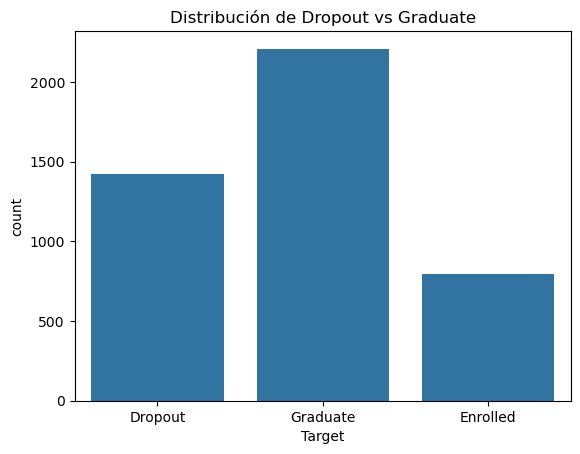

In [3]:
# Distribución del target
sns.countplot(x='Target', data=df)
plt.title('Distribución de Dropout vs Graduate')
plt.savefig('../reports/target_distribution.png')
plt.show()

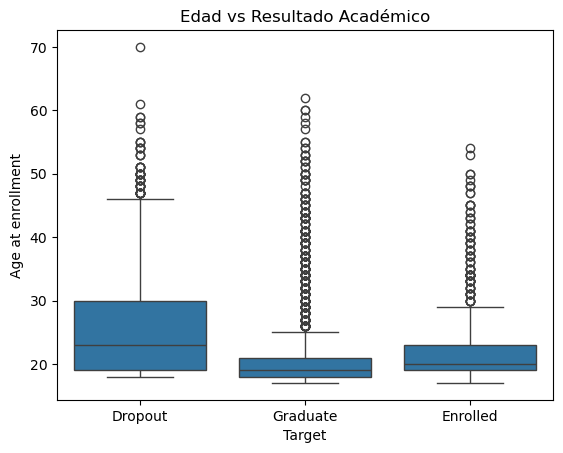

In [4]:
# Análisis demográfico - Edad
sns.boxplot(x='Target', y='Age at enrollment', data=df)
plt.title('Edad vs Resultado Académico')
plt.savefig('../reports/age_analysis.png')
plt.show()


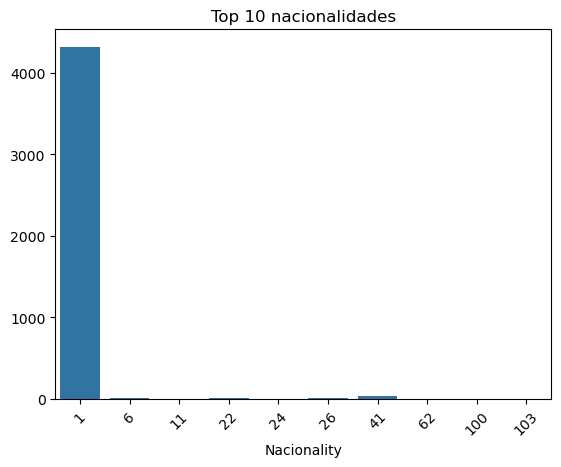

In [5]:
# Análisis demográfico - Nacionalidad
top_nacionalities = df['Nacionality'].value_counts().head(10)
sns.barplot(x=top_nacionalities.index, y=top_nacionalities.values)
plt.xticks(rotation=45)
plt.title('Top 10 nacionalidades')
plt.savefig('../reports/nationality_analysis.png')
plt.show()

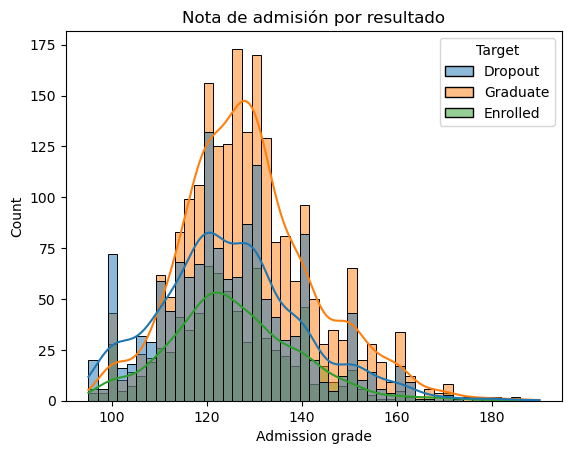

In [6]:
# Análisis académico - Nota de admisión
sns.histplot(data=df, x='Admission grade', hue='Target', kde=True)
plt.title('Nota de admisión por resultado')
plt.savefig('../reports/admission_grade_analysis.png')
plt.show()

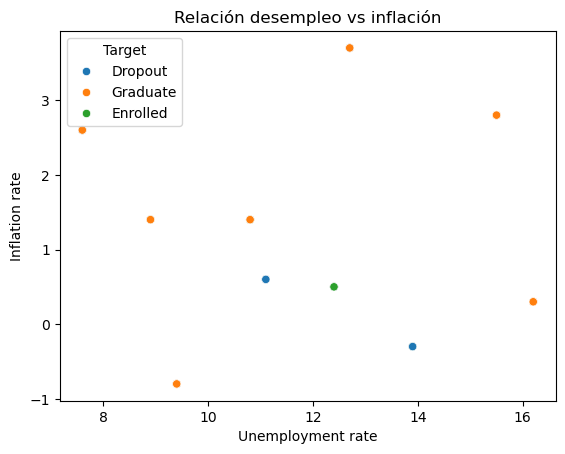

In [7]:
# Análisis económico - Desempleo vs Inflación
sns.scatterplot(x='Unemployment rate', y='Inflation rate', hue='Target', data=df)
plt.title('Relación desempleo vs inflación')
plt.savefig('../reports/economic_analysis.png')
plt.show()

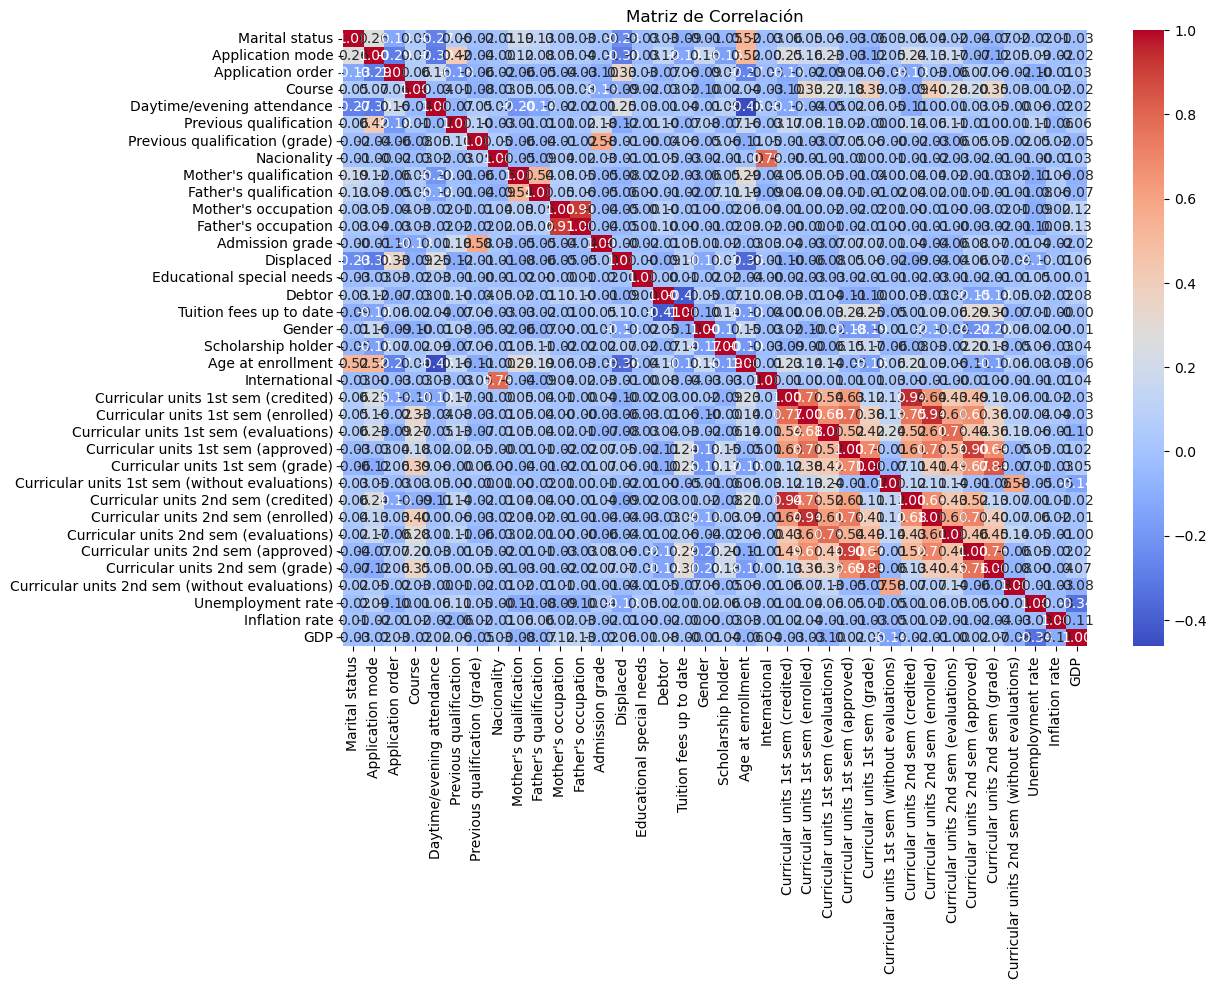

In [13]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.savefig('../reports/correlation_matrix.png')